In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import sys

In [5]:
! {sys.executable} -m pip install citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=865ca963f97a87cb8d75e5560c84efe9


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | bata
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | la sarre
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | rognan
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | panzhihua
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | axim
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | skagastrond
City not found. Skipping...
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | launceston
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | maldonado
Processing Record 47 of Set 4 | los corrales de buelna
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | luwuk
Processing Record 50 of Set 4 | lhokseumawe
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | kungurtug
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | guaymas
Processing Record 6 of Set 5 | kuva
City not found. Skipping...
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | sharjah
Processing Record 9 of Set 5 | ostrovnoy
Processing Record 10 of Set 5 | vanimo
Processing Record 11 of Set 5 | saint-georges
Processing Record 12 of Set 5 | nikolskoye
Processing Record

Processing Record 28 of Set 8 | changji
Processing Record 29 of Set 8 | anchorage
Processing Record 30 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 8 | uuemoisa
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | tapes
Processing Record 34 of Set 8 | giehun
Processing Record 35 of Set 8 | bermeo
Processing Record 36 of Set 8 | energetik
Processing Record 37 of Set 8 | cartagena del chaira
Processing Record 38 of Set 8 | tugulym
Processing Record 39 of Set 8 | diourbel
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | ola
Processing Record 42 of Set 8 | luganville
Processing Record 43 of Set 8 | pimentel
Processing Record 44 of Set 8 | pontal do parana
Processing Record 45 of Set 8 | binahaan
Processing Record 46 of Set 8 | tottori
Processing Record 47 of Set 8 | buraydah
Processing Record 48 of Set 8 | arman
Processing Record 49 of Set 8 | livingston
Processing Record 50 of Set 8 | yirol
City not found. S

Processing Record 13 of Set 12 | falealupo
City not found. Skipping...
Processing Record 14 of Set 12 | pangoa
Processing Record 15 of Set 12 | khandyga
Processing Record 16 of Set 12 | shinjo
Processing Record 17 of Set 12 | krasnoarmeysk
Processing Record 18 of Set 12 | buchanan
Processing Record 19 of Set 12 | ermelo
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | laguna
Processing Record 22 of Set 12 | evanston
Processing Record 23 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 24 of Set 12 | joshimath
Processing Record 25 of Set 12 | jeremie
Processing Record 26 of Set 12 | tadine
Processing Record 27 of Set 12 | piranhas
Processing Record 28 of Set 12 | papasquiaro
City not found. Skipping...
Processing Record 29 of Set 12 | tabasco
Processing Record 30 of Set 12 | lianyuan
Processing Record 31 of Set 12 | liaocheng
Processing Record 32 of Set 12 | katherine
Processing Record 33 of Set 12 | lere
Processing Record 34 of Set 12 

In [12]:
print(len(city_data))

583


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.52,57.52,78.80,74,75,11.41,MU,2020-02-21 02:27:57
1,Atuona,-9.80,-139.03,81.61,74,64,17.65,PF,2020-02-21 02:27:57
2,Isangel,-19.55,169.27,84.20,74,40,4.70,VU,2020-02-21 02:27:57
3,Sioux Lookout,50.10,-91.92,17.60,61,5,12.75,CA,2020-02-21 02:27:58
4,Codrington,-38.27,141.97,58.39,69,24,13.18,AU,2020-02-21 02:27:58
5,Hilo,19.73,-155.09,75.20,60,90,6.93,US,2020-02-21 02:27:58
6,Bata,1.86,9.77,76.08,96,100,1.14,GQ,2020-02-21 02:27:58
7,Ushuaia,-54.80,-68.30,51.80,71,75,8.05,AR,2020-02-21 02:25:07
8,La Sarre,48.80,-79.20,12.47,92,100,9.89,CA,2020-02-21 02:27:59
9,Kapaa,22.08,-159.32,78.80,73,90,14.99,US,2020-02-21 02:27:59


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2020-02-21 02:27:57,-20.52,57.52,78.80,74,75,11.41
1,Atuona,PF,2020-02-21 02:27:57,-9.80,-139.03,81.61,74,64,17.65
2,Isangel,VU,2020-02-21 02:27:57,-19.55,169.27,84.20,74,40,4.70
3,Sioux Lookout,CA,2020-02-21 02:27:58,50.10,-91.92,17.60,61,5,12.75
4,Codrington,AU,2020-02-21 02:27:58,-38.27,141.97,58.39,69,24,13.18
5,Hilo,US,2020-02-21 02:27:58,19.73,-155.09,75.20,60,90,6.93
6,Bata,GQ,2020-02-21 02:27:58,1.86,9.77,76.08,96,100,1.14
7,Ushuaia,AR,2020-02-21 02:25:07,-54.80,-68.30,51.80,71,75,8.05
8,La Sarre,CA,2020-02-21 02:27:59,48.80,-79.20,12.47,92,100,9.89
9,Kapaa,US,2020-02-21 02:27:59,22.08,-159.32,78.80,73,90,14.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/20/20'

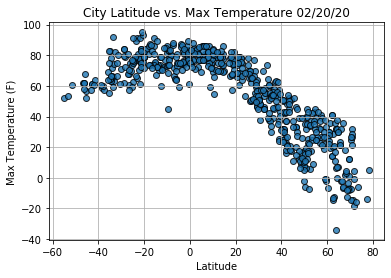

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

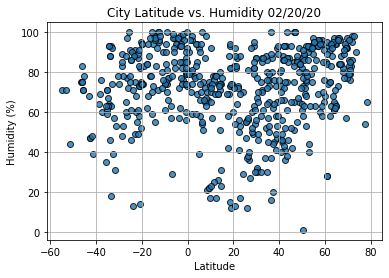

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

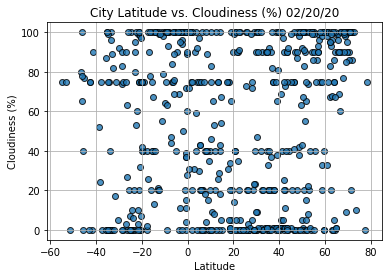

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

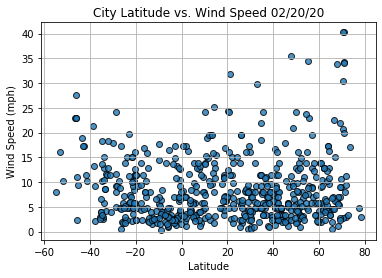

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2020-02-21 02:27:59
Lat                          42.1
Lng                        -79.24
Max Temp                       23
Humidity                       66
Cloudiness                     90
Wind Speed                   8.05
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
578    False
579    False
580     True
581     True
582    False
Name: Lat, Length: 583, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Sioux Lookout,CA,2020-02-21 02:27:58,50.10,-91.92,17.60,61,5,12.75
5,Hilo,US,2020-02-21 02:27:58,19.73,-155.09,75.20,60,90,6.93
6,Bata,GQ,2020-02-21 02:27:58,1.86,9.77,76.08,96,100,1.14
8,La Sarre,CA,2020-02-21 02:27:59,48.80,-79.20,12.47,92,100,9.89
9,Kapaa,US,2020-02-21 02:27:59,22.08,-159.32,78.80,73,90,14.99
10,Rognan,NO,2020-02-21 02:27:59,67.10,15.39,36.00,88,90,14.99
11,Ponta Do Sol,PT,2020-02-21 02:27:59,32.67,-17.10,55.40,71,20,4.70
12,Panzhihua,CN,2020-02-21 02:27:59,26.59,101.71,61.65,36,0,1.66
13,Jamestown,US,2020-02-21 02:27:59,42.10,-79.24,23.00,66,90,8.05
14,Dingle,PH,2020-02-21 02:28:00,11.00,122.67,78.91,78,65,18.95


In [57]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

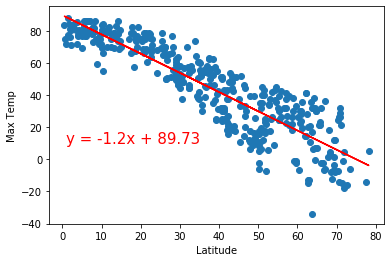

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(1,10))

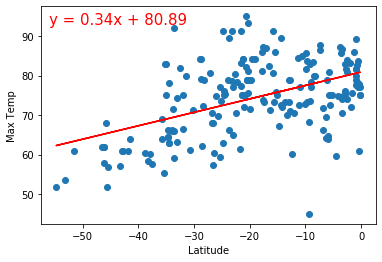

In [78]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-56,93))

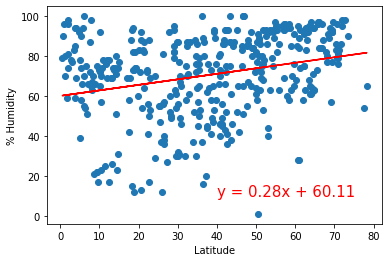

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

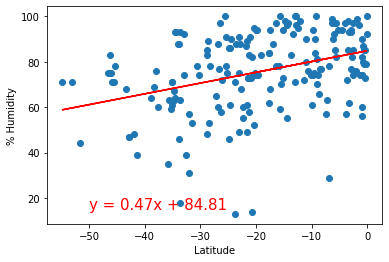

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

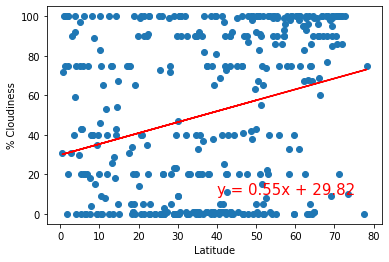

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

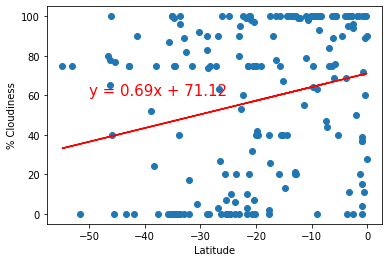

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

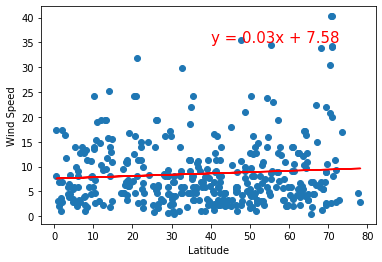

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

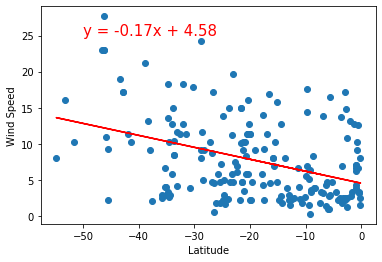

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,25))